In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -d -v

Sebastian Raschka 07/10/2015 

CPython 3.4.3
IPython 3.2.0


# Cheatsheet for Decision Tree Classification 

### Algorithm

1. Start at the root node as parent node
2. Split the parent node at the feature ***a*** to minimize the sum of the child node impurities (maximize information gain)
3. Assign training samples to new child nodes
3. Stop if leave nodes are pure or early stopping criteria is satisfied, else repeat steps 1 and 2 for each new child node

### Stopping Rules

- a maximal node depth is reached
- splitting a note does not lead to an information gain

### Criterion

Splitting criterion: Information Gain (IG), sum of node impurities

Objective function: Maximize IG at each split, eqiv. minimize the the impurity criterion


### Information Gain (IG)

***Examples below are given for binary splits.***

$$IG(D_{p}, a) = I(D_{p}) - \frac{N_{left}}{N_p} I(D_{left}) - \frac{N_{right}}{N_p} I(D_{right})$$

- $IG$: Information Gain
- $a$: feature to perform the split
- $N_p$: number of samples in the parent node
- $N_{left}$: number of samples in the left child node
- $N_{right}$: number of samples in the right child node
- $I$: impurity
- $D_{p}$: training subset of the parent node
- $D_{left}$: training subset of the left child node
- $D_{right}$: training subset of the right child node

# Impurity (I) Indices


### Entropy

The entropy is defined as
$$I_H(t) = - \sum_{i =1}^{C} p(i \mid t) \;log_2 \,p(i \mid t)$$

for all non-empty classes ($p(i \mid t) \neq 0$), where $p(i \mid t)$ is the proportion (or frequency or probability) of the samples that belong to class $i$ for a particular node $t$; $C$ is the number of unique class labels.

The entropy is therefore 0 if all samples at a node belong to the same class, and the entropy is maximal if we have an uniform class distribution. For example, in a binary class setting, the entropy is 0 if  $p(i =1 \mid t) =1$ or $p(i =0 \mid t) =1$. And if the classes are distributed uniformly with $p(i =1 \mid t) = 0.5$ and $p(i =0 \mid t) =0.5$ the entropy is 1 (maximal), which we can visualize by plotting the entropy for binary class setting below.


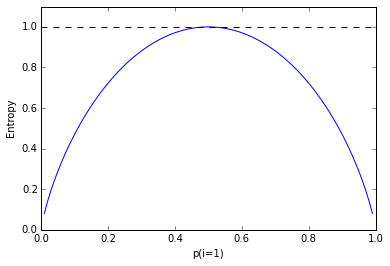

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
plt.plot(x, ent)
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylabel('Entropy')
plt.show()

### Gini Impurity

$$I_G(t) =  \sum_{i =1}^{C}p(i \mid t) \big(1-p(i \mid t)\big)$$

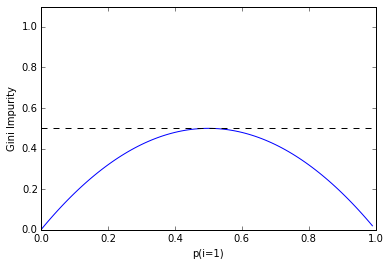

In [5]:
def gini(p):
    return (p)*(1 - (p)) + (1-p)*(1 - (1-p))

x = np.arange(0.0, 1.0, 0.01)
plt.plot(x, gini(x))
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
plt.ylabel('Gini Impurity')
plt.show()

### Misclassification Error

$$I_M(t) =  1 - max\{{p_i}\}$$


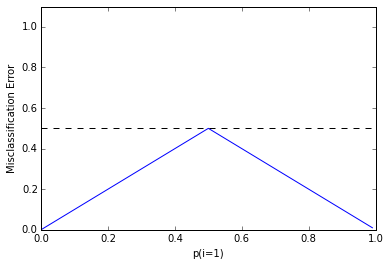

In [6]:
def error(p):
    return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
err = [error(i) for i in x]
plt.plot(x, err)
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
plt.ylabel('Misclassification Error')
plt.show()

### Comparison

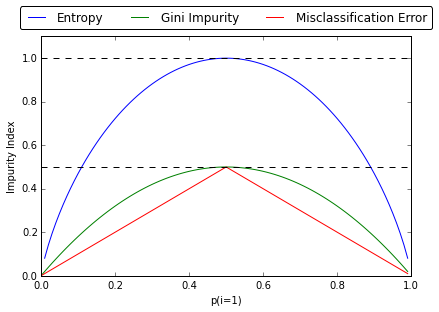

In [7]:
fig = plt.figure()
ax = plt.subplot(111)

for i, lab in zip([ent, gini(x), err], 
                  ['Entropy', 'Gini Impurity', 'Misclassification Error']):
    line, = ax.plot(x, i, label=lab)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.tight_layout()
plt.show()